# Tema III: Clustering y Análisis No Supervisado

**1. ¿Qué es el Clustering?**

El Clustering es una técnica de aprendizaje no supervisado que busca agrupar un conjunto de objetos de tal manera que los objetos en el mismo grupo (llamado cluster) sean más similares entre sí que a los de otros clusters.

**Objetivo:** Descubrir patrones, estructuras o relaciones inherentes en los datos sin la necesidad de etiquetas preexistentes.

Diferencia clave con la Clasificación: En la clasificación, el modelo aprende a asignar datos a categorías conocidas; en el clustering, el modelo crea esas categorías basándose en la similitud de los datos.

Aplicaciones Comunes:
1. Segmentación de Mercado: Agrupar clientes con comportamientos de compra similares.
2. Análisis de Documentos: Organizar documentos por temas.
3. Biología: Clasificación de especies o análisis genético.
4. Detección de Anomalías/Fraude: Identificar patrones que no encajan en ningún cluster principal.
5. Compresión de Datos: Reducir la complejidad de los datos al representarlos por sus clusters.

**2. Conceptos Fundamentales en Clustering**
1. Cluster: Un grupo de puntos de datos que comparten características comunes y son "cercanos" entre sí.

2. Similitud / Disimilitud: La base para agrupar objetos. Se mide típicamente a través de distancias (cuanto menor la distancia, mayor la similitud).
Centroid (Centroide): El punto promedio de todos los objetos en un cluster. Usado en métodos como K-Means.

3. Medoid (Medoide): Un punto de datos real dentro del cluster que es el más representativo o "central" de todos los puntos del cluster. Usado en K-Medoids.

4. Impureza de Cluster: Medida de cuán mezcladas están las clases (si se conocen las etiquetas reales para evaluación) o cuán dispersos están los puntos dentro de un cluster.

**3. Tipos de Algoritmos de Clustering**
Existen diversas familias de algoritmos de clustering, cada una con sus propias suposiciones y fortalezas:

**3.1. Métodos de Partición (Partitioning Methods)**

Dividen los datos en un número predefinido de clusters (k).

**K-Means:**

Principio: Asigna iterativamente los puntos a los clusters basándose en la distancia a los centroides y luego actualiza los centroides. Elige k centroides iniciales aleatoriamente. Asigna cada punto de datos al centroide más cercano. Recalcula la posición de cada centroide como el promedio de todos los puntos asignados a él. Repite los pasos hasta que los centroides no se muevan significativamente o se alcance un número máximo de iteraciones.

**Fortalezas:** Simple, rápido y eficiente para grandes datasets.

Debilidades: Requiere que el usuario especifique k de antemano. Sensible a la inicialización de los centroides (puede converger a mínimos locales). Tiende a formar clusters de forma esférica y tamaño similar. Sensible a outliers.

**Cómo Determinar el Número Óptimo de Clusters (k)**

Uno de los mayores desafíos en el clustering (especialmente para K-Means) es cómo elegir el valor de k.

**Método del Codo (Elbow Method):**

Calcula la Inercia (o WCSS - Within-Cluster Sum of Squares) para diferentes valores de k.

La Inercia es la suma de las distancias al cuadrado de cada punto a su centroide de cluster más cercano. Un valor más bajo indica clusters más compactos.

Grafica la Inercia vs. k. El "codo" en el gráfico (donde la disminución de la inercia comienza a desacelerarse significativamente) sugiere un k óptimo.

**Coeficiente de Silueta (Silhouette Score):**

Mide cuán similar es un objeto a su propio cluster (cohesión) en comparación con otros clusters (separación). El valor oscila entre -1 y +1.

1. Cercano a +1: El objeto está bien emparejado con su propio cluster y mal emparejado con clusters vecinos
2. Cercano a 0: El objeto está en o muy cerca del límite entre dos clusters.
3. Cercano a -1: El objeto está probablemente en el cluster equivocado.

Se calcula el promedio del coeficiente de silueta para todos los puntos. Un valor más alto indica un mejor agrupamiento.

**Índice Davies-Bouldin:**

Mide la relación entre la dispersión dentro del cluster y la separación entre clusters. Un valor más bajo indica un mejor agrupamiento (clusters más compactos y mejor separados).

**Gap Statistic:** Compara la Inercia del clustering con la de una distribución de datos de referencia (aleatoria). Busca el k donde la brecha es más grande.

A menudo, la mejor k viene de la comprensión del problema y de cuántos grupos se espera lógicamente.

Un valor de 0.3 en el Silhouette Score significa que tu clustering es débil o razonable, pero no particularmente fuerte. Es mucho mejor que un valor cercano a cero (como 0.03), pero aún hay un margen considerable para la mejora.

Lo que significa un puntaje de 0.3
Un Silhouette Score de 0.3 te dice que los clusters tienen una forma o cohesión discernible, pero que los puntos de datos no están tan bien separados. Los clusters no son tan compactos o distintos como podrían ser. Muchos puntos se encuentran cerca de los límites entre clusters vecinos, lo que sugiere que las agrupaciones no son tan claras.

Guía general para interpretar el puntaje:

1. **0.7 a 1.0:** Los clusters están bien separados, son densos y los puntos están bien asignados.
2. **0.5 a 0.7:** Los clusters son razonablemente compactos y separados, pero la calidad no es perfecta.
3. **0.2 a 0.5:** Los clusters son débiles y no están muy bien separados. Hay un solapamiento significativo o los clusters son muy dispersos. Tu puntaje de 0.3 se encuentra en este rango.
4. **< 0.2:** El clustering es prácticamente indistinguible del azar y el resultado es poco fiable.

In [210]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
import numpy as np
from sklearn.metrics import completeness_score, silhouette_score

In [211]:
# Carga del dataset desde Kaggle public URL (repositorio espejo)
df= pd.read_csv('/Users/leydi/MC Apli/Mall_customers.csv')
df.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [212]:
# Exploración básica del dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

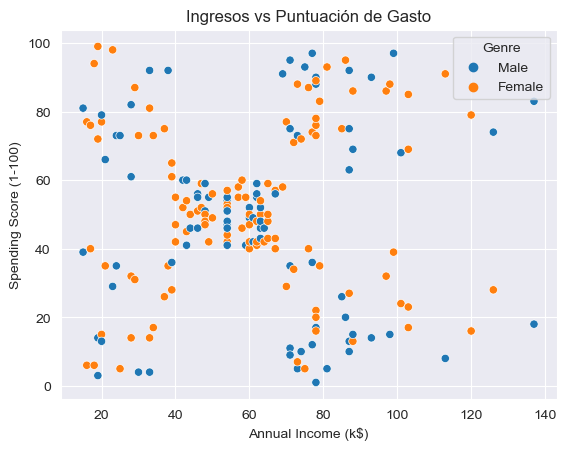

In [213]:
# Visualización de dispersión por ingresos vs puntuación de gasto
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre')
plt.title('Ingresos vs Puntuación de Gasto')
plt.show()

In [214]:
# Preprocesamiento para clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

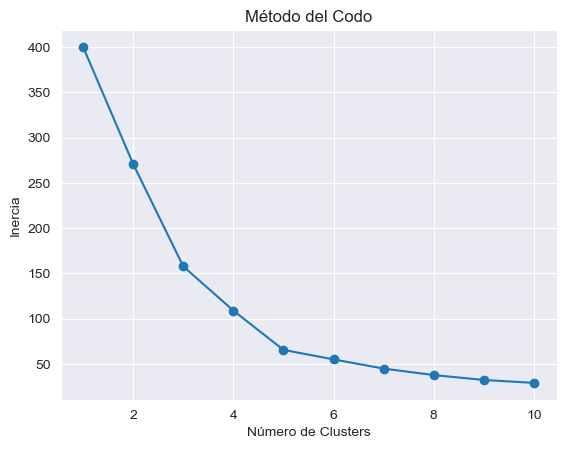

In [215]:
# K-Means Clustering: encontrar número óptimo de clusters (método del codo)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leydi\AppData\Local\Temp\ipykernel_14572\2825150997.py:26: FutureWarning: The operation <function std at 0x0000020962F03C70> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  cluster_std = df.groupby('cluster').agg(np.std).values


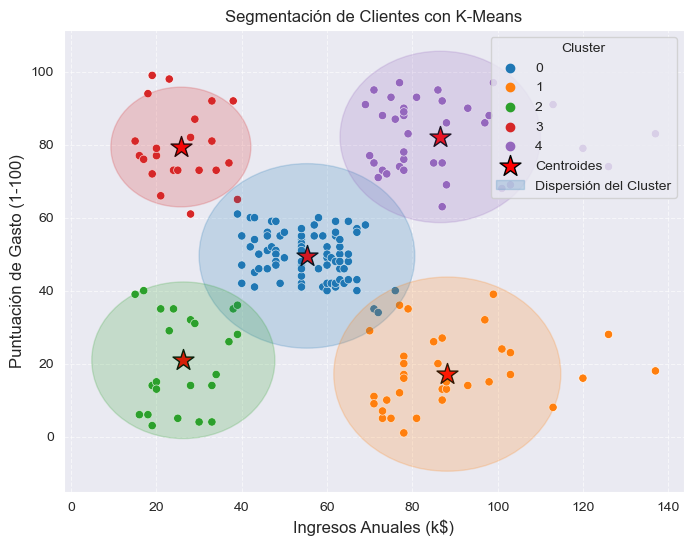

In [216]:
# Aplicar K-Means con k=5
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

# Obtener los centroides
centroids_scaled = kmeans.cluster_centers_

# --- INVERTIR LA TRANSFORMACIÓN de los centroides ---
# Este paso es VITAL para que los centroides se ubiquen en la misma escala que tus datos originales
centroids_original_scale = scaler.inverse_transform(centroids_scaled)

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='tab10',ax = ax)
# AÑADIR LOS CENTROIDES al gráfico
ax.scatter( x=centroids_original_scale[:, 0],  # Eje x de los centroides
             y=centroids_original_scale[:, 1],  # Eje y de los centroides
             s=250,  # Tamaño de los puntos de los centroides
             marker='*', # Marcador en forma de estrella
             c='red',    # Color de los centroides
             edgecolor='k',
             label='Centroides')

# --- AÑADIR LOS CÍRCULOS (Radios) para cada cluster ---
# Calcular la desviación estándar de cada cluster
cluster_std = df.groupby('cluster').agg(np.std).values

# Iterar sobre los centroides para dibujar un círculo
# Un buen "radio" visual puede ser 1 o 2 veces la desviación estándar, esto representa 87% en una distribucion normal
for i in range(len(centroids_original_scale)):
    ax.add_patch(plt.Circle(
        (centroids_original_scale[i, 0], centroids_original_scale[i, 1]), # Centro del círculo
        cluster_std[i].mean() * 1.8,       # Radio basado en la desviación estándar promedio
        color=sns.color_palette('tab10')[i],
        alpha=0.2,                         # Transparencia del círculo
        fill=True,
        label='Dispersión del Cluster' if i == 0 else "" # Añadir etiqueta solo una vez
    ))
ax.set_title('Segmentación de Clientes con K-Means')
ax.set_xlabel('Ingresos Anuales (k$)', fontsize=12)
ax.set_ylabel('Puntuación de Gasto (1-100)', fontsize=12)
ax.legend(title='Cluster', loc='upper right')
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Que significan los puntos fuera?**

No son "Outliers" en General: Es importante diferenciar. Un "outlier" en el contexto de un solo cluster no significa necesariamente que sea un outlier para todo el dataset. Simplemente significa que es un punto inusual dentro de su grupo asignado.

Estos puntos pueden indicarte que el número de clusters (k) o la forma de los clusters no es la ideal. Tal vez ese punto pertenezca a un cluster vecino o incluso a un cluster que aún no ha sido detectado. Hay que hacer un análisis adicional.

Es importante recordar que el **Completeness Score** y otras métricas externas son más útiles para fines de investigación o cuando tienes un *conjunto de datos con etiquetas* que te sirve como referencia. 

**El Silhouette Score** es más práctico para evaluar la calidad de tus clusters en la mayoría de los casos de la vida real, donde no tienes etiquetas de verdad. Mide la cohesión y separación de los clusters sin necesidad de etiquetas de verdad. Cuanto más cerca de 1.0, mejor es el agrupamiento.

In [217]:
silhouette = silhouette_score(X, kmeans.labels_)
print(f"El Silhouette Score es: {silhouette:.4f}")

El Silhouette Score es: 0.5539


**K-Medoids (PAM - Partitioning Around Medoids):**

1. Principio: Similar a K-Means, pero utiliza medoides (puntos de datos reales) en lugar de centroides calculados (promedios).
2. Fortalezas: Más robusto a outliers que K-Means porque los medoides son puntos de datos reales.
3. Debilidades: Más lento que K-Means para grandes datasets $(O(k⋅n^2)$ por iteración).

In [219]:
!pip install scikit-learn-extra 
#para garantizar instalacion de libreria que tiene el método

Defaulting to user installation because normal site-packages is not writeable


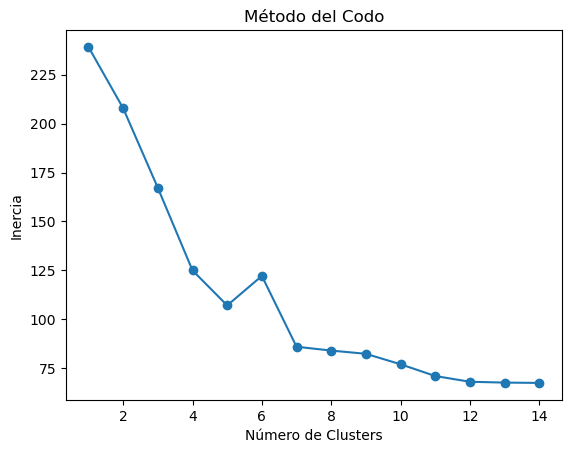

In [9]:
from sklearn_extra.cluster import KMedoids

inertia = []
for k in range(1, 15):
    kmed = KMedoids(n_clusters=k, random_state=42) ### Aque hacemos el cambio
    kmed.fit(X_scaled)
    inertia.append(kmed.inertia_)

plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

C:\Users\leydi\AppData\Local\Temp\ipykernel_14572\2965165578.py:26: FutureWarning: The operation <function std at 0x0000020962F03C70> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  cluster_std = df.groupby('cluster').agg(np.std).values


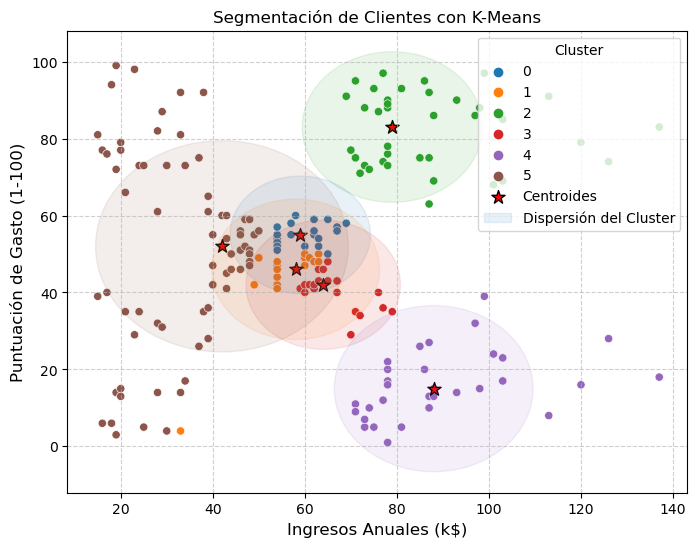

In [23]:
# Aplicar K-Means con k=5
kmed = KMedoids(n_clusters=6, random_state=42)
kmed.fit(X_scaled)
df['cluster'] = kmed.labels_

# Obtener los centroides
centroids_scaled = kmed.cluster_centers_

# --- INVERTIR LA TRANSFORMACIÓN de los centroides ---
# Este paso es VITAL para que los centroides se ubiquen en la misma escala que tus datos originales
centroids_original_scale = scaler.inverse_transform(centroids_scaled)

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='tab10',ax = ax)
# AÑADIR LOS CENTROIDES al gráfico
ax.scatter( x=centroids_original_scale[:, 0],  # Eje x de los centroides
             y=centroids_original_scale[:, 1],  # Eje y de los centroides
             s=100,  # Tamaño de los puntos de los centroides
             marker='*', # Marcador en forma de estrella
             c='red',    # Color de los centroides
             edgecolor='k',
             label='Centroides')

# --- AÑADIR LOS CÍRCULOS (Radios) para cada cluster ---
# Calcular la desviación estándar de cada cluster
cluster_std = df.groupby('cluster').agg(np.std).values

# Iterar sobre los centroides para dibujar un círculo
# Un buen "radio" visual puede ser 1 o 2 veces la desviación estándar, esto representa 87% en una distribucion normal
for i in range(len(centroids_original_scale)):
    ax.add_patch(plt.Circle(
        (centroids_original_scale[i, 0], centroids_original_scale[i, 1]), # Centro del círculo
        cluster_std[i].mean() * 1.5,       # Radio basado en la desviación estándar promedio
        color=sns.color_palette('tab10')[i],
        alpha=0.1,                         # Transparencia del círculo
        fill=True,
        label='Dispersión del Cluster' if i == 0 else "" # Añadir etiqueta solo una vez
    ))
ax.set_title('Segmentación de Clientes con K-Means')
ax.set_xlabel('Ingresos Anuales (k$)', fontsize=12)
ax.set_ylabel('Puntuación de Gasto (1-100)', fontsize=12)
ax.legend(title='Cluster', loc='upper right')
ax.grid(True, linestyle='--', alpha=0.6)
plt.show()

**3.2. Métodos Jerárquicos (Hierarchical Methods)**
Construyen una jerarquía de clusters, representada visualmente por un dendrograma. No requieren que se especifique k de antemano; k se puede elegir cortando el dendrograma a una altura específica.

*Agglomerative (Bottom-up - Ascendente)*: Comienza con cada punto de datos como su propio cluster. En cada paso, fusiona los dos clusters más cercanos hasta que solo queda un cluster. Criterios de Enlace (Linkage Criteria - cómo se mide la distancia entre clusters):

*Single Linkage (Enlace Único)*: La distancia más corta entre cualquier par de puntos en los dos clusters. Tiende a formar clusters largos y delgados (problema de "encadenamiento").

*Complete Linkage (Enlace Completo):* La distancia más larga entre cualquier par de puntos en los dos clusters. Tiende a formar clusters más compactos y esféricos.

*Average Linkage (Enlace Promedio):* La distancia promedio entre todos los pares de puntos en los dos clusters.

*Ward's Method:* Minimiza la varianza dentro de cada cluster al fusionar. Tiende a producir clusters de tamaño más uniforme.

*Divisive (Top-down - Descendente):* Comienza con todos los puntos en un solo cluster grande. En cada paso, divide el cluster en dos subclusters hasta que cada punto es un cluster individual.

**Debilidades:** Menos común en la práctica, computacionalmente más intensivo $(O(n^3)$ para Agglomerative), no escala bien a grandes datasets. Las decisiones de fusión/división son permanentes (no se pueden deshacer).

**Fortalezas:** No se necesita especificar k de antemano. El dendrograma proporciona una visión clara de la estructura anidada de los clusters.

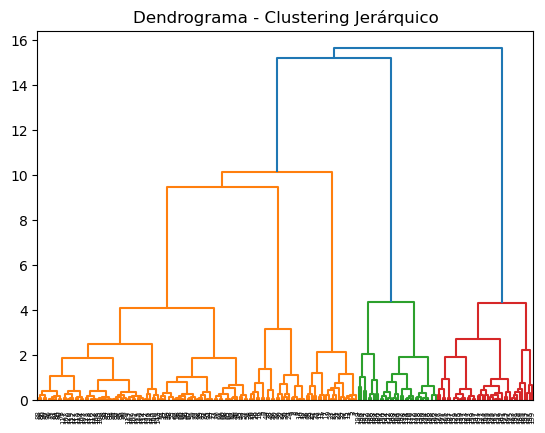

In [11]:
# Clustering Jerárquico - Dendrograma
linked = linkage(X_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrograma - Clustering Jerárquico')
plt.show()

Este notebook aplica técnicas de clustering utilizando el dataset **Mall Customers**.

**Objetivos:**
- Realizar análisis exploratorio de variables socioeconómicas.
- Aplicar K-Means y visualización de grupos segmentados.
- Introducir clustering jerárquico y DBSCAN.

In [136]:
direc = '/Users/leydi/MC Apli/bank-additional-full.csv'
bnk = pd.read_csv(direc,sep =';')
bnk.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

<Figure size 2400x1200 with 0 Axes>

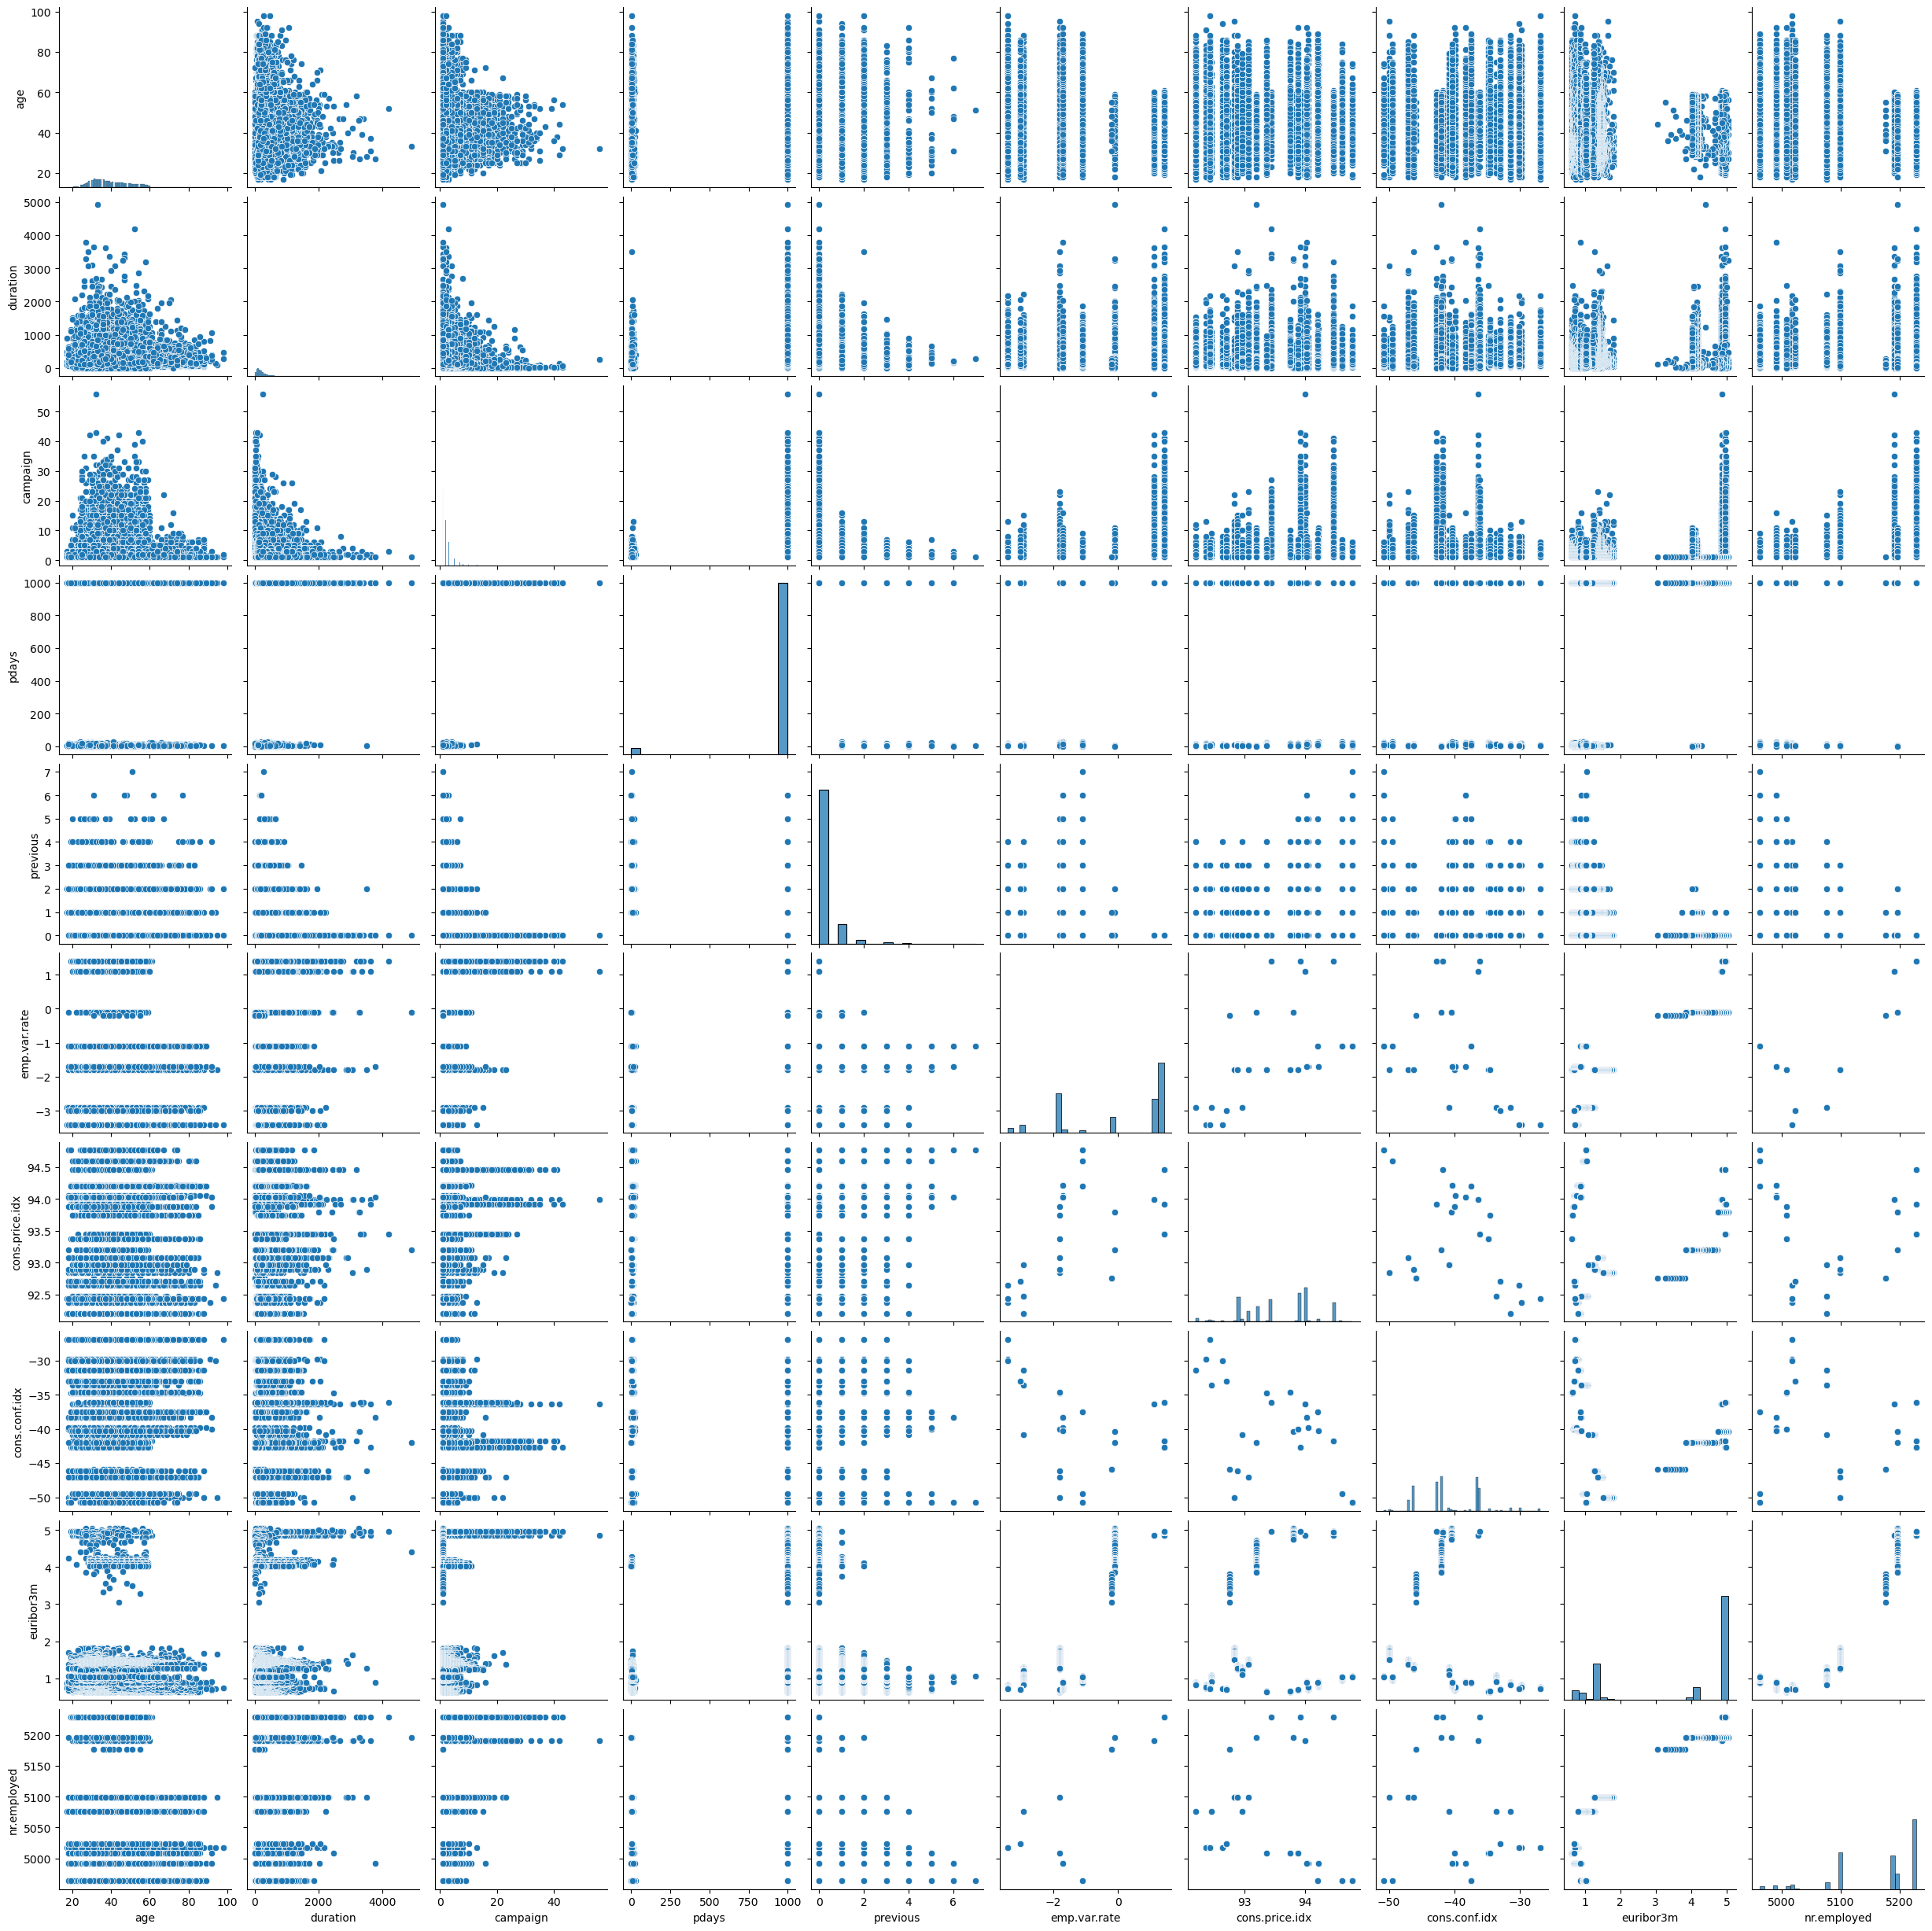

In [13]:
# Definimos area del grafico
plt.figure(figsize=(24, 12))
sns.pairplot(data=bnk)

In [35]:
def clustersBNK(bnk,var1,var2,titulo):
# Preprocesamiento para clustering
    X = bnk[[var1, var2]]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

# K-Means Clustering: encontrar número óptimo de clusters (método del codo)
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42,n_init=10) #n_init le dice al algoritmo que ejecute el proceso n veces 
                                                                 #con diferentes selecciones de centroides iniciales
                                                                # y que luego elija la mejor de las n ejecuciones.
        kmeans.fit(X_scaled)
        inertia.append(kmeans.inertia_)
        
    
    plt.figure(figsize= (5, 3))
    plt.plot(range(1, 11), inertia, marker='o')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inercia')
    plt.title('Método del Codo')
    plt.grid()
    plt.show()

# Aplicar K-Means seleccionado
    nClus = int(input('Introduce numero de clusters apropiado'))
    kmeans = KMeans(n_clusters=nClus, random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    bnk['cluster'] = kmeans.labels_
    sns.scatterplot(data=bnk, x=var1, y=var2, hue='cluster', palette='tab10')
    plt.title(titulo)
    plt.show()
    
    silhouette = silhouette_score(X, kmeans.labels_)
    print(f"El Silhouette Score es: {silhouette:.4f}")

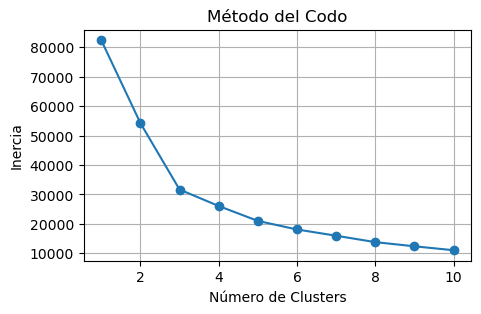

Introduce numero de clusters apropiado4


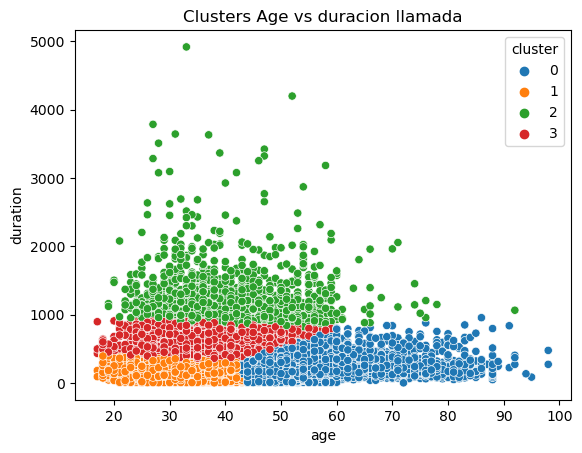

El Silhouette Score es: 0.1296


In [36]:
clustersBNK(bnk,'age','duration','Clusters Age vs duracion llamada')

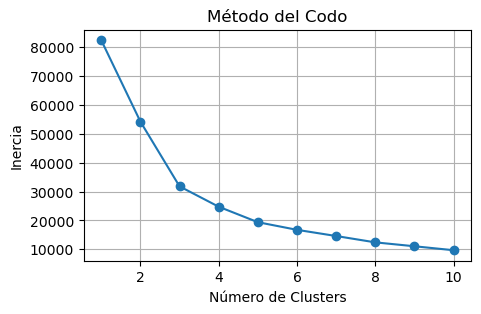

Introduce numero de clusters apropiado4


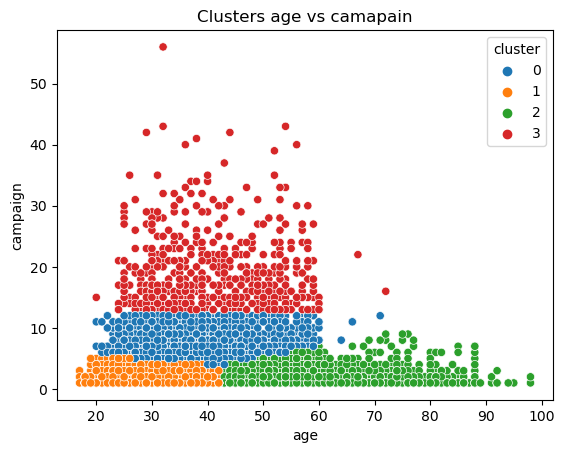

El Silhouette Score es: 0.3845


In [37]:
clustersBNK(bnk,'age','campaign','Clusters age vs camapain')

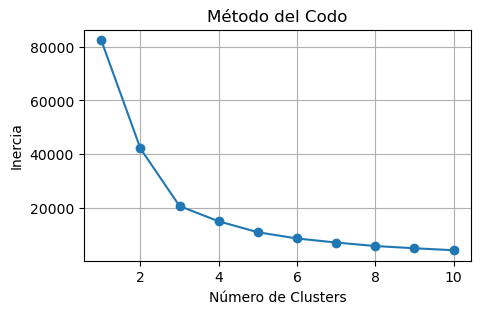

Introduce numero de clusters apropiado4


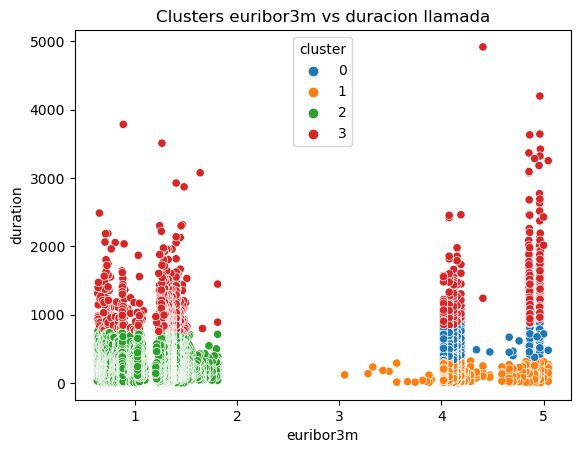

El Silhouette Score es: 0.1534


In [38]:
clustersBNK(bnk,'euribor3m','duration','Clusters euribor3m vs duracion llamada')

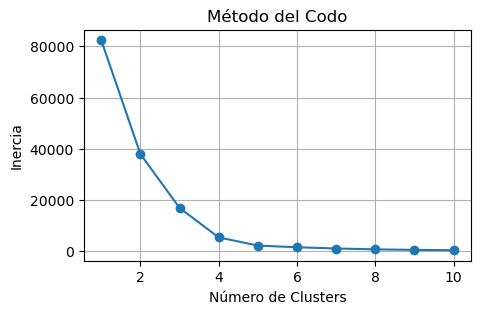

Introduce numero de clusters apropiado5


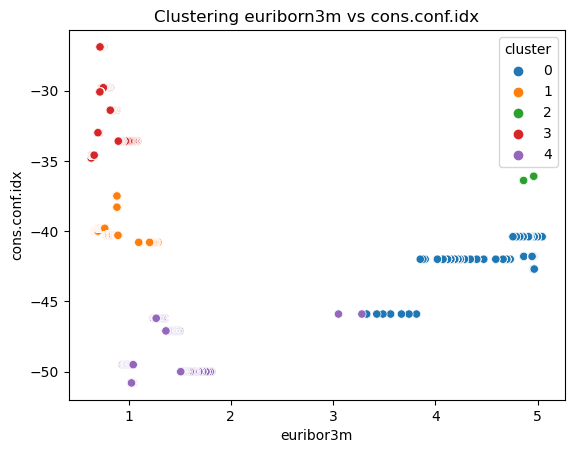

El Silhouette Score es: 0.8687


In [39]:
clustersBNK(bnk,'euribor3m','cons.conf.idx','Clustering euriborn3m vs cons.conf.idx')

In [41]:
tienda = pd.read_csv('Store_CA.csv')
tienda.head()

ProductVariety  MarketingSpend  CustomerFootfall  StoreSize  \
0             581              29              1723        186   
1             382              31              1218        427   
2             449              35              2654        142   
3             666               9              2591        159   
4             657              35              2151        275   

   EmployeeEfficiency  StoreAge  CompetitorDistance  PromotionsCount  \
0                84.9         1                  12                6   
1                75.8        18                  11                6   
2                92.8        14                  11                6   
3                66.3        11                  11                4   
4                89.1        28                  12                7   

   EconomicIndicator StoreLocation StoreCategory  MonthlySalesRevenue  
0              108.3   Los Angeles   Electronics               284.90  
1               97.8   Los Angeles   Electronics               308.21  
2              101.1   Los Angeles       Grocery               292.11  
3              115.1    Sacramento      Clothing               279.61  
4               93.4     Palo Alto   Electronics               359.71

<Figure size 2400x1200 with 0 Axes>

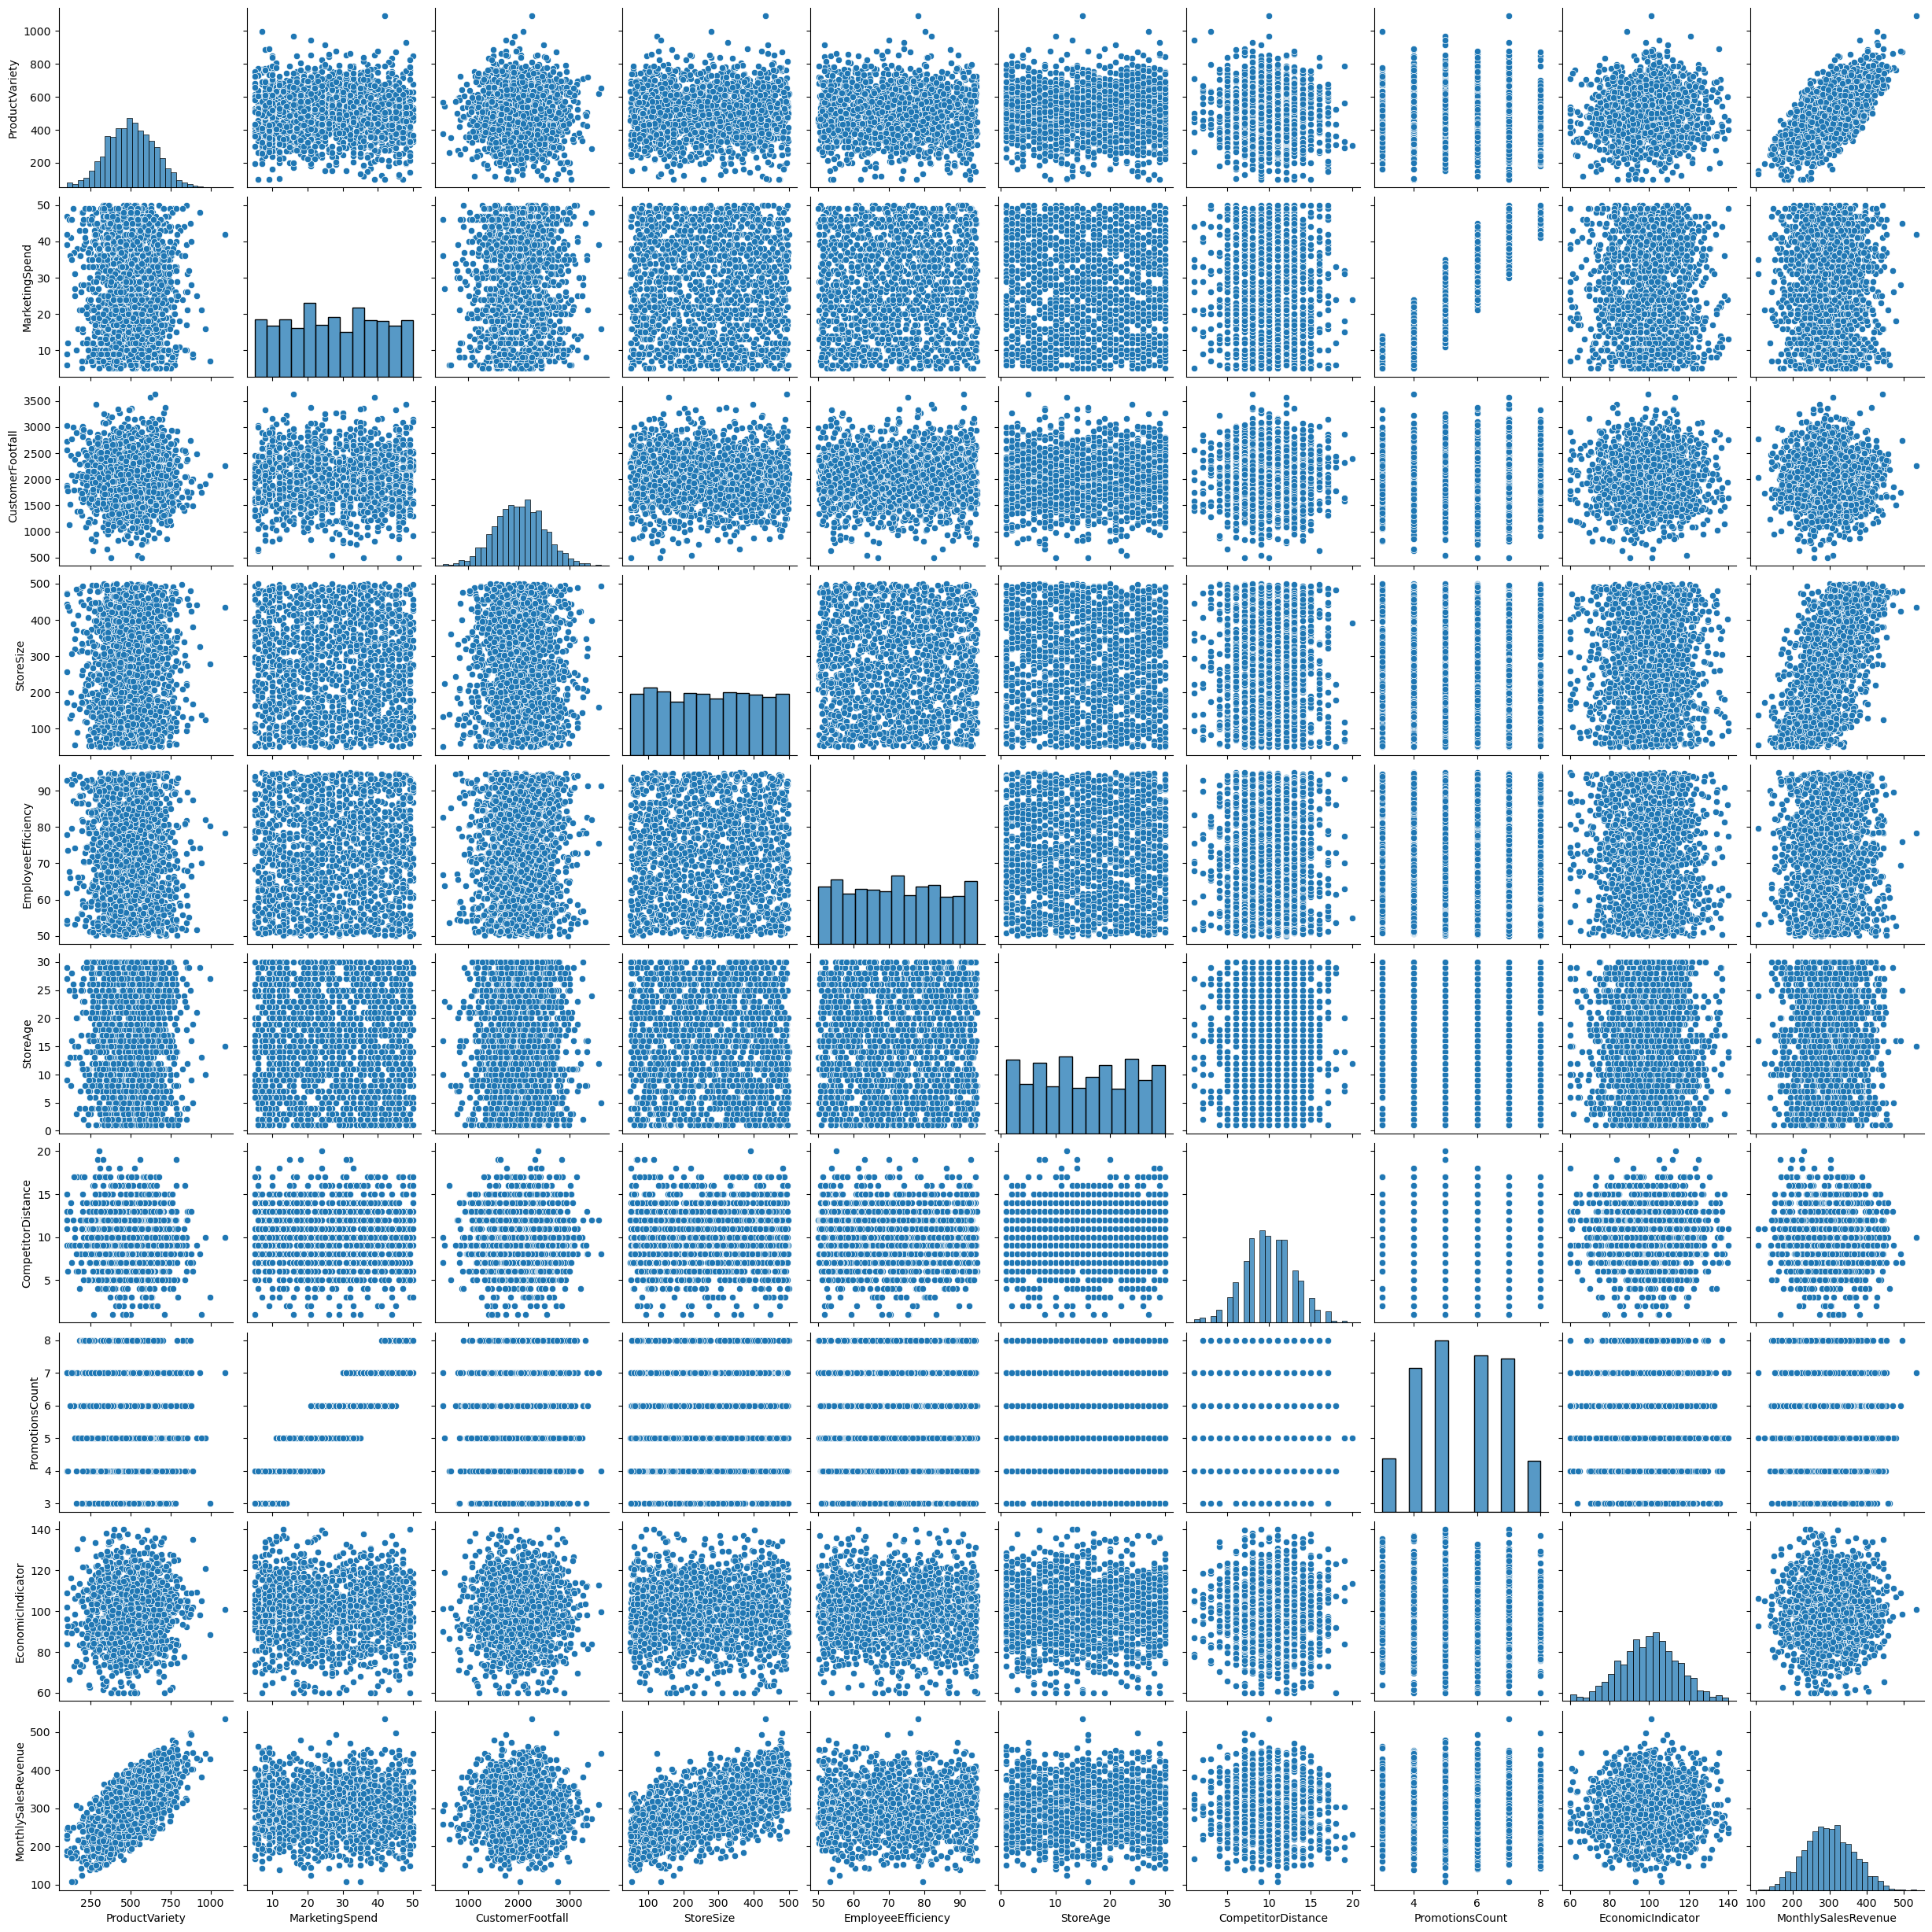

In [4]:
plt.figure(figsize=(24, 12))
sns.pairplot(data=tienda) #que podemos concluir?

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

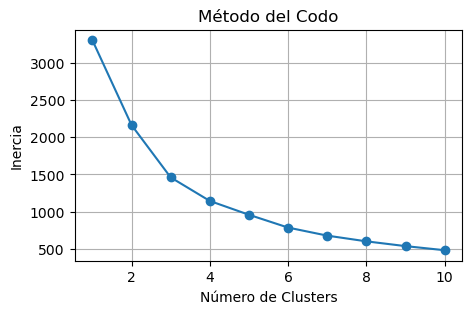

Introduce numero de clusters apropiado5


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


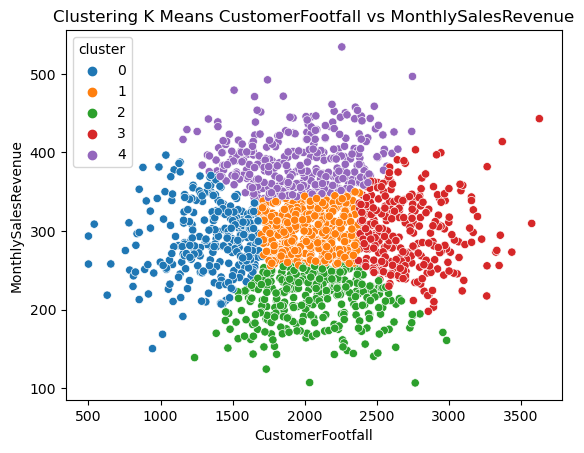

El Silhouette Score es: 0.1519


In [42]:
clustersBNK(tienda,'CustomerFootfall','MonthlySalesRevenue','Clustering K Means CustomerFootfall vs MonthlySalesRevenue') 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

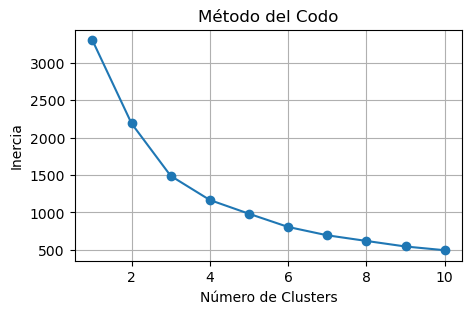

Introduce numero de clusters apropiado4


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


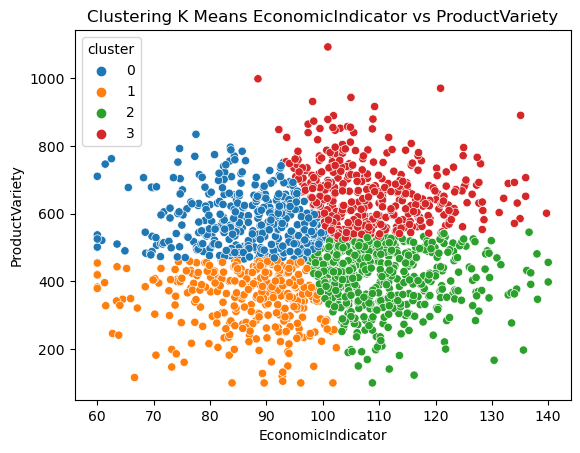

El Silhouette Score es: 0.0640


In [43]:
clustersBNK(tienda,'EconomicIndicator','ProductVariety','Clustering K Means EconomicIndicator vs ProductVariety') 

Un valor de 0.06 indica que la mayoría de los puntos están en o muy cerca de la frontera de los clusters. En esencia, tus clusters están tan mezclados que no se pueden diferenciar claramente.

**3.3. Métodos Basados en Densidad (Density-Based Methods)**

Identifican clusters como regiones densas de puntos separadas por regiones menos densas. Son buenos para encontrar clusters de forma arbitraria y para detectar ruido (outliers).

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**

Método que se basa en la densidad de los puntos de datos. En lugar de depender de la distancia, este algoritmo busca encontrar regiones densas de puntos y considera los puntos menos densos como ruido o puntos atípicos.

Conceptos Clave:

1. Punto Central (Core Point): Un punto que tiene al menos min_samples (un número mínimo de puntos) dentro de una distancia epsilon (ϵ) de sí mismo.
2. Punto Fronterizo (Border Point): Un punto que está dentro de la distancia ϵ de un punto central, pero no es un punto central en sí mismo.
3. Punto de Ruido (Noise Point): Un punto que no es ni central ni fronterizo (es un outlier).

Selecciona un punto no visitado. Si es un punto central, comienza a formar un cluster, expandiendo el cluster a todos los puntos que están densamente conectados (directa o indirectamente). Si no es un punto central, se marca como ruido. Continúa hasta que todos los puntos han sido visitados.

**eps (epsilon):** Es el radio del vecindario de un punto. Indica la distancia máxima para que dos puntos sean considerados vecinos. La elección de eps es crucial; un valor muy pequeño no conectará los puntos en un cluster, y uno muy grande hará que la mayoría de los puntos se agrupen en un solo cluster.

**min_samples:** Es el número mínimo de puntos que deben estar presentes en un vecindario (dentro del radio eps) para que un punto sea considerado un punto central (core point). Los puntos que no cumplen este criterio se consideran de borde o de ruido.

*Fortalezas:* Puede encontrar clusters de forma arbitraria. Es robusto al ruido y los outliers. No requiere especificar k de antemano.

*Debilidades:* Dificultad para manejar clusters de densidades variadas. Sensible a la elección de los parámetros ϵ y min_samples.

**3.4. Métodos Basados en Modelos (Model-Based Methods)**

Asumen que los datos provienen de una mezcla de distribuciones probabilísticas (comúnmente Gaussianas).

**Gaussian Mixture Models (GMM):**

1. Principio: Asume que cada cluster es una distribución Gaussiana. El algoritmo trata de encontrar los parámetros (media, varianza/covarianza) de estas Gaussianas que mejor expliquen los datos.
2. Asignación Probabilística: A diferencia de K-Means que hace una asignación "dura" (un punto pertenece a un solo cluster), GMM hace una asignación "suave" (un punto tiene una probabilidad de pertenecer a cada cluster).
3. Algoritmo: Típicamente se utiliza el algoritmo de Expectation-Maximization (EM).

*Fortalezas:* Puede capturar clusters de formas más complejas (no solo esféricas) al usar matrices de covarianza. Proporciona asignaciones probabilísticas, lo cual es útil para análisis de incertidumbre.

*Debilidades:* Asume una forma paramétrica para los clusters (ej. Gaussianas). Sensible a la inicialización.

In [78]:
from sklearn.cluster import DBSCAN

def clustersDBSCAN(bnk,var1,var2,titulo,eps,min_samples):
# Preprocesamiento para clustering
    X = bnk[[var1, var2]]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

# Introducimos los parametros de eps y min_samples
    dbscan = DBSCAN(eps = eps,min_samples = min_samples)
    clusters = dbscan.fit_predict(X_scaled)

    bnk['cluster'] = clusters
    sns.scatterplot(data=bnk, x=var1, y=var2, hue='cluster', palette='tab10')
    plt.title(titulo)
    plt.show()
    
    silhouette = silhouette_score(X, clusters)
    print(f"El Silhouette Score es: {silhouette:.4f}")

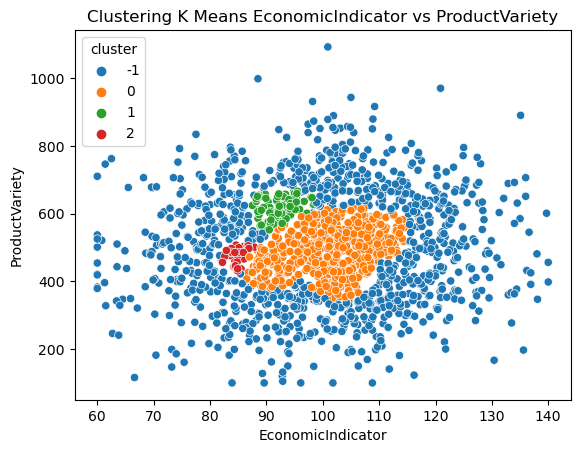

El Silhouette Score es: -0.3612


In [79]:
clustersDBSCAN(tienda,'EconomicIndicator','ProductVariety','Clustering K Means EconomicIndicator vs ProductVariety',0.3,60) 

In [126]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

def clustersDBSCAN_mod(bnk,var1,var2,titulo,min_samples):
# Preprocesamiento para clustering
    X = bnk[[var1, var2]]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(X_scaled)
    distances, indices = neighbors_fit.kneighbors(X_scaled)

    # --- Ordenar las distancias para la visualización ---
    # Obtenemos la distancia al k-ésimo vecino (la última columna)
    # y la ordenamos de menor a mayor
    distances = np.sort(distances[:, min_samples-1], axis=0)

    # ---  Plotear el gráfico de la k-distancia ---
    plt.figure(figsize=(9, 3))
    plt.plot(distances)
    plt.title('Gráfico de la K-Distancia para el Método del Codo', fontsize=10)
    plt.xlabel('Puntos de Datos (ordenados)', fontsize=8)
    plt.ylabel(f'{min_samples}-ésima Distancia del Vecino Más Cercano', fontsize=7)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # ---  Interpretación ---
    print(f"El valor de `min_samples` usado fue: {min_samples}")
    print("Busca un 'codo' en la curva. El valor de Y en ese punto es un buen candidato para `eps`.")
    eps = float(input('Introduce valor de eps'))

# Introducimos los parametros de eps y min_samples
    dbscan = DBSCAN(eps = eps,min_samples = min_samples)
    clusters = dbscan.fit_predict(X_scaled)

    bnk['cluster'] = clusters
    sns.scatterplot(data=bnk, x=var1, y=var2, hue='cluster', palette='tab10')
    plt.title(titulo)
    plt.show()
    
    silhouette = silhouette_score(X, clusters)
    print(f"El Silhouette Score es: {silhouette:.4f}")

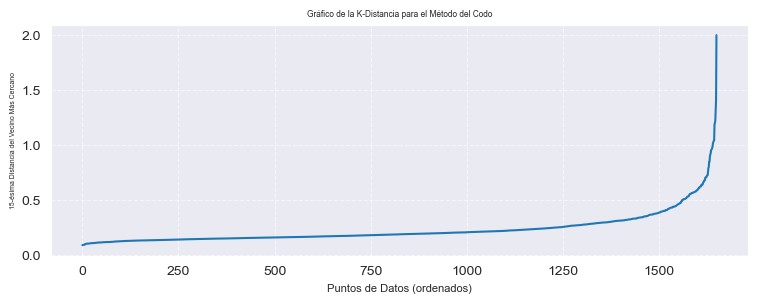

El valor de `min_samples` usado fue: 15
Busca un 'codo' en la curva. El valor de Y en ese punto es un buen candidato para `eps`.
Introduce valor de eps0.4


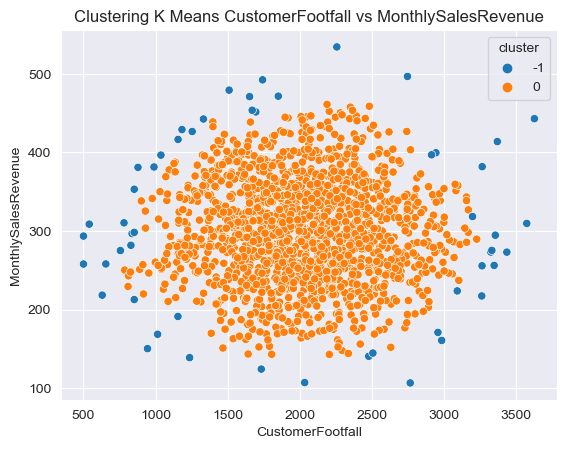

El Silhouette Score es: 0.4658


In [220]:
clustersDBSCAN_mod(tienda,'CustomerFootfall','MonthlySalesRevenue','Clustering K Means CustomerFootfall vs MonthlySalesRevenue',15) 

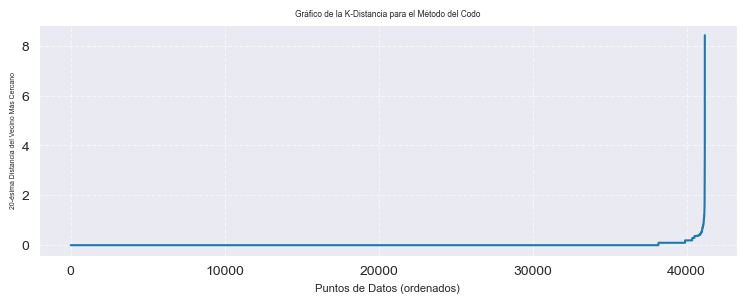

El valor de `min_samples` usado fue: 20
Busca un 'codo' en la curva. El valor de Y en ese punto es un buen candidato para `eps`.
Introduce valor de eps0.5


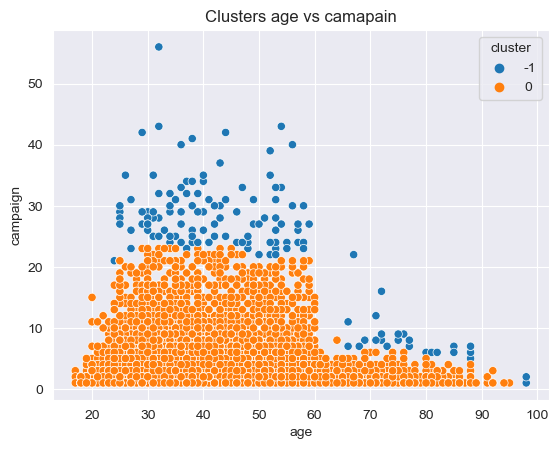

El Silhouette Score es: 0.6127


In [221]:
clustersDBSCAN_mod(bnk,'age','campaign','Clusters age vs camapain',20)

**5. Desafíos y Consideraciones en el Clustering**

1. La "Maldición de la Dimensionalidad": En espacios de muy alta dimensión, las distancias entre puntos se vuelven menos significativas, lo que dificulta el clustering.
2. Escalabilidad: Algunos algoritmos no escalan bien a grandes volúmenes de datos.
3. Normalización/Escalado: Los algoritmos basados en distancia (K-Means, Jerárquico) son sensibles a la escala de las características. Es crucial escalar los datos (ej. StandardScaler).
4. Manejo de Outliers: Los outliers pueden distorsionar los centroides o la formación de clusters (especialmente en K-Means).
5. Determinación Subjetiva: La elección del algoritmo, las métricas de distancia y el número de clusters a menudo implican un juicio subjetivo y conocimiento del dominio.
6. Interpretación: Una vez que los clusters se forman, el desafío es entender qué representan esos grupos y cómo pueden ser útiles.

In [195]:
from sklearn.decomposition import PCA

def realizar_pca(df, n_componentes):
    """
    Realiza un Análisis de Componentes Principales (PCA) en un DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame de entrada con los datos numéricos.
        n_componentes (int): El número de componentes principales a conservar.

    Returns:
        tuple: Una tupla que contiene:
            - Un DataFrame con las componentes principales.
            - Una lista con la varianza explicada por cada componente.
    """
    # 1. Estandarizar los datos
    # PCA es sensible a la escala, por lo que este paso es crucial.
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)

    # 2. Instanciar y ajustar el modelo PCA
    # Se ajusta PCA con los datos estandarizados.
    pca = PCA(n_components=n_componentes)
    pca.fit(df_scaled)

    # 3. Transformar los datos
    # Se transforman los datos originales al nuevo espacio de componentes.
    df_pca = pca.transform(df_scaled)

    # 4. Crear un DataFrame con las componentes principales
    # Nombramos las columnas para facilitar la interpretación.
    columnas_pca = [f'PC{i+1}' for i in range(n_componentes)]
    df_pca = pd.DataFrame(data=df_pca, columns=columnas_pca)

    # 5. Obtener la varianza explicada por cada componente
    # Esto te dice cuánta información (varianza) captura cada componente.
    varianza_explicada = pca.explained_variance_ratio_
    
    return df_pca, varianza_explicada

In [196]:
direc = '/Users/leydi/MC Apli/bank-additional-full.csv'
bnk = pd.read_csv(direc,sep =';')
bnk.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [197]:
bnk.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [198]:
bnk = pd.get_dummies(bnk, drop_first = True)
bnk['y'] = bnk['y_yes']
bnk.drop(columns=['y_yes'], inplace=True)
bnk.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_nov  month_oct  \
0          -36.4      4.857       5191.0  ...          0          0   
1          -36.4      4.857       5191.0  ...          0          0   
2          -36.4      4.857       5191.0  ...          0          0   
3          -36.4      4.857       5191.0  ...          0          0   
4          -36.4      4.857       5191.0  ...          0          0   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0                1                0                0   
1          0                1                0                0   
2          0                1                0                0   
3          0                1                0                0   
4          0                1                0                0   

   day_of_week_wed  poutcome_nonexistent  poutcome_success  y  
0                0                     1                 0  0  
1                0                     1                 0  0  
2                0                     1                 0  0  
3                0                     1                 0  0  
4                0                     1                 0  0  

[5 rows x 54 columns]

In [199]:
# Separación de variables
X = bnk.drop('y', axis=1)
y = bnk['y']

# Cual es numero adecuado de componentes?

La recomendación general es mantener un número de características que capture una alta proporción de la varianza total de los datos originales. Una buena práctica es elegir las componentes principales que expliquen entre el 85% y el 95% de la varianza.

**El Método del "Codo" (Scree Plot)**
La forma más común de decidir cuántas características mantener después de aplicar PCA es usando un gráfico de la varianza explicada.

**¿Qué es?** Es un gráfico que muestra la varianza explicada por cada componente principal.

**¿Cómo se usa?** Buscas el "codo" en la curva, el punto donde la varianza explicada deja de disminuir de forma significativa. Este punto sugiere un buen número de componentes.

In [208]:
def numero_comp(X):
    X_scaled = StandardScaler().fit_transform(X)

    # Realizar PCA sin especificar el número de componentes
    pca = PCA().fit(X_scaled)
    # Graficar la varianza explicada
    plt.figure(figsize=(9, 5))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Número de Componentes')
    plt.ylabel('Varianza Acumulada Explicada')
    plt.title('Gráfico de Varianza Explicada por PCA')
    plt.grid()
    plt.show()

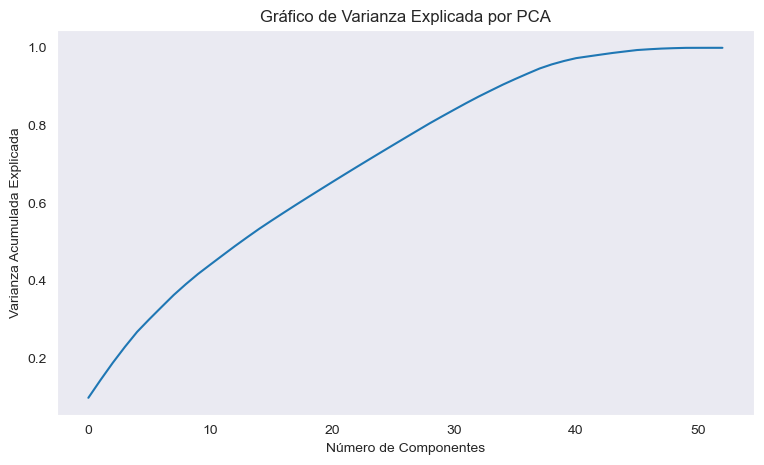

In [209]:
numero_comp(X)

In [200]:
componentes_principales, varianza = realizar_pca(X, n_componentes=15)

print("\n--- Varianza Explicada por cada Componente ---")
for i, v in enumerate(varianza):
    print(f'PC{i+1}: {v:.4f} ({v*100:.2f}%)')

print(f"\nLa varianza total explicada por las 2 componentes es: {varianza.sum():.4f} ({varianza.sum()*100:.2f}%)")


--- Varianza Explicada por cada Componente ---
PC1: 0.0992 (9.92%)
PC2: 0.0459 (4.59%)
PC3: 0.0441 (4.41%)
PC4: 0.0411 (4.11%)
PC5: 0.0386 (3.86%)
PC6: 0.0324 (3.24%)
PC7: 0.0312 (3.12%)
PC8: 0.0309 (3.09%)
PC9: 0.0279 (2.79%)
PC10: 0.0258 (2.58%)
PC11: 0.0236 (2.36%)
PC12: 0.0232 (2.32%)
PC13: 0.0228 (2.28%)
PC14: 0.0219 (2.19%)
PC15: 0.0211 (2.11%)

La varianza total explicada por las 2 componentes es: 0.5299 (52.99%)


In [155]:
#El dataframe X transformado
componentes_principales.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.567984  1.873265  0.676984 -0.199105  0.117017  1.357909  0.726433   
1 -1.772233  1.890955 -0.605091  0.311220 -0.313160  1.690973  2.921152   
2 -1.408642  0.668325 -1.051932  0.439905 -0.677100  1.736613  2.703115   
3 -1.576908  1.727743 -0.445129 -0.077893 -0.099750  1.357635 -0.263108   
4 -1.474670  1.303090 -0.593110  0.276764 -0.508808  1.753569  3.036475   

        PC8       PC9      PC10  
0 -0.014455 -0.260903  0.483733  
1 -1.553329  0.179437 -0.237745  
2 -1.329946 -0.002523 -0.904835  
3  0.672169 -0.067369  0.191614  
4 -1.490122 -0.047986 -0.598271

In [143]:
dataBNK_mod = componentes_principales
dataBNK_mod['y']= y
dataBNK_mod.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.567307  1.890149  0.716975 -0.182405  0.152475  1.391522 -0.186500   
1 -1.772570  1.886763 -0.585072  0.284814 -0.263073  1.754302 -2.526821   
2 -1.409029  0.665778 -1.050790  0.421716 -0.669738  1.817151 -2.295908   
3 -1.576981  1.740742 -0.428364 -0.061642  0.006986  1.331297  0.451492   
4 -1.475187  1.305883 -0.596842  0.246986 -0.502917  1.825395 -2.466741   

        PC8       PC9      PC10  y  
0 -1.151679  0.458272 -0.402355  0  
1 -2.161260 -0.171276 -0.267633  0  
2 -2.014547 -0.199132 -0.909752  0  
3  0.162039 -0.079931 -0.602348  0  
4 -2.219214  0.115491 -0.338932  0

**Entrenamos modelos usando X resultante del PCA**

Regresion Logistica: 0.8963340616654528
Decision Tree Accuracy: 0.8448652585579024
Random Forest Accuracy: 0.897952577486445
Gradient Boosting Accuracy: 0.8990855385611395


Modelo  Accuracy  Presicion  F1-Score  Recall - Sensabilidad
0     Tree     0.845      0.321     0.329                  0.338
1  RandomF     0.898      0.622     0.346                  0.239
2   GBoost     0.899      0.695     0.293                  0.185
3   RegLog     0.896      0.646     0.277                  0.176

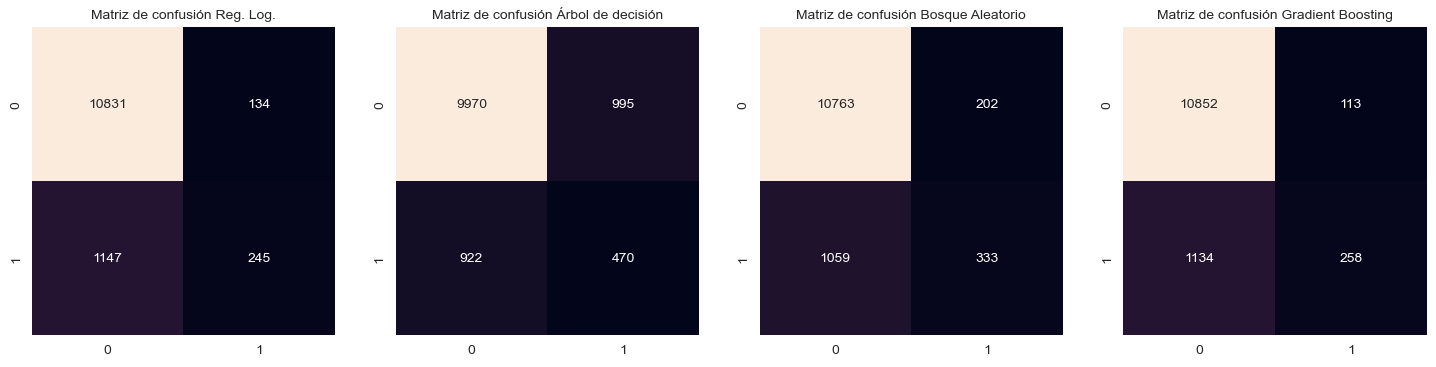

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Separación de variables
X = dataBNK_mod.drop('y', axis=1)
y = dataBNK_mod['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

#regresion logistica
Log_reg = LogisticRegression()
result = Log_reg.fit(X_train,y_train)
#Usamos el modelo entrenado sobre el dataset de testeo
y_pred_logr = Log_reg.predict(X_test)
print("Regresion Logistica:", accuracy_score(y_test, y_pred_logr))
cm_tunedlr = confusion_matrix(y_test, y_pred_logr)


# Árbol de Decisión
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(X_train, y_train)
y_pred_tree = clf_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
cm_tuneddt = confusion_matrix(y_test, y_pred_tree)

# Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
cm_tunedrf = confusion_matrix(y_test, y_pred_rf)


# Gradient Boosting
clf_gb = GradientBoostingClassifier(random_state=42)
clf_gb.fit(X_train, y_train)
y_pred_gb = clf_gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
cm_tunedgb = confusion_matrix(y_test, y_pred_gb)


#Graficamos las matrices de confusion
fig = plt.figure(figsize= (18, 4))
ax1 = fig.add_subplot(1,4,1)
ax1 = sns.heatmap(cm_tunedlr, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Reg. Log.', fontsize=10)

ax2 = fig.add_subplot(1,4,2)
ax2=sns.heatmap(cm_tuneddt, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Árbol de decisión', fontsize=10)

ax3 = fig.add_subplot(1,4,3)
ax3= sns.heatmap(cm_tunedrf, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Bosque Aleatorio', fontsize=10)

ax4 = fig.add_subplot(1,4,4)
sns.heatmap(cm_tunedgb, annot=True, fmt='d', cbar=False)
plt.title('Matriz de confusión Gradient Boosting', fontsize=10)

#Resumen de los valores obtenidos:
resultados3 = pd.DataFrame(
    {'Modelo': ['Tree','RandomF','GBoost','RegLog'], 
     'Accuracy':[round(accuracy_score(y_test, y_pred_tree),3),round(accuracy_score(y_test, y_pred_rf),3),round(accuracy_score(y_test, y_pred_gb),3),round(accuracy_score(y_test, y_pred_logr),3)],
      'Presicion':[round(precision_score(y_test, y_pred_tree),3),round(precision_score(y_test, y_pred_rf),3),round(precision_score(y_test, y_pred_gb),3),round(precision_score(y_test, y_pred_logr),3)],
      'F1-Score':[round(f1_score(y_test, y_pred_tree),3),round(f1_score(y_test, y_pred_rf),3),round(f1_score(y_test, y_pred_gb),3),round(f1_score(y_test, y_pred_logr),3)],
      'Recall - Sensabilidad':[round(recall_score(y_test, y_pred_tree),3),round(recall_score(y_test, y_pred_rf),3),round(recall_score(y_test, y_pred_gb),3),round(recall_score(y_test, y_pred_logr),3)], 
      
    } )                               
resultados3